<a href="https://colab.research.google.com/github/MatheusRobles/Ex_Machine_Learn_I/blob/main/EX_Machine_Learn_Aula_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('titanic')

In [16]:
print(df.head())
print(df.info())
print(df.describe())
print(df.nunique())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

In [17]:
# Verificar a presença de valores faltantes
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [25]:
df['age'].fillna(df['age'].median(), inplace=True)
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


In [24]:
df = df.drop('deck', axis=1)
most_frequent = df['embark_town'].mode()[0]
df['embark_town'] = df['embark_town'].fillna(most_frequent)
most_frequent = df['embarked'].mode()[0]
df['embarked'] = df['embarked'].fillna(most_frequent)
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64


In [26]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

# Selecionar as features e o target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

# Separar os dados em X (features) e y (target)
X = df[features]
y = df[target]

# Definir as colunas que precisam de codificação one-hot
categorical_cols = ['sex', 'embarked']

# Criar o pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Criar o pipeline completo com pré-processamento e modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])

# Fazer o fit do modelo
pipeline.fit(X, y)

# Prever os valores de sobrevivência
y_pred = pipeline.predict(X)

# Calcular as métricas
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
confusion = confusion_matrix(y, y_pred)

# Imprimir as métricas
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.7867564534231201
Precision: 0.7420382165605095
Confusion Matrix:
[[468  81]
 [109 233]]


In [33]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["survived"])
y = df["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

Modelo: Árvore de Decisão
Acurácia: 0.8156424581005587
Precisão: 0.7647058823529411
Matriz de Confusão:
[[91 19]
 [20 49]]

Modelo: Regressão Logística
Acurácia: 0.8156424581005587
Precisão: 0.7647058823529411
Matriz de Confusão:
[[93 17]
 [23 46]]

Modelo: Random Forest
Acurácia: 0.8156424581005587
Precisão: 0.7647058823529411
Matriz de Confusão:
[[94 16]
 [17 52]]



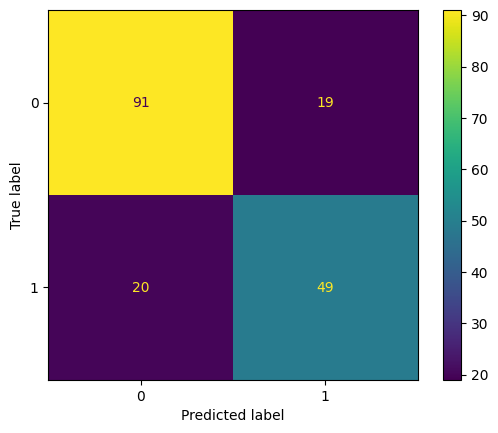

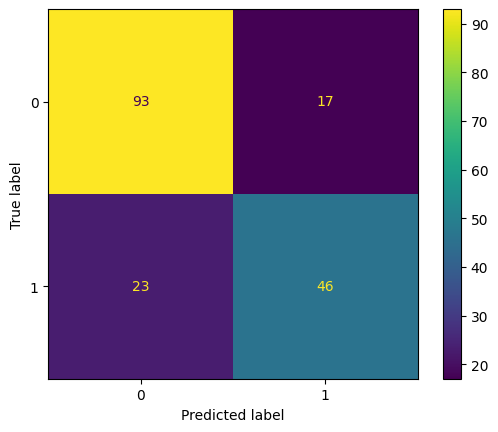

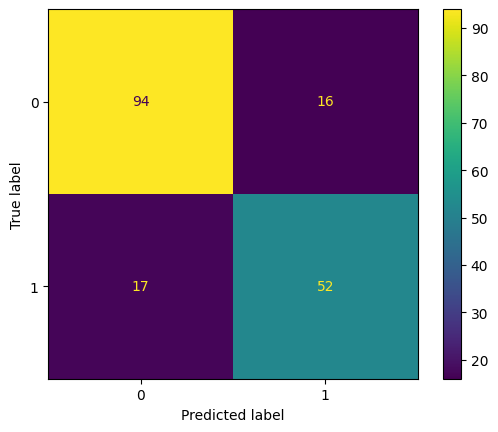

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Definir colunas numéricas e categóricas
numeric_features = ['age', 'fare']
categorical_features = ['sex']

# Pipeline para pré-processamento de colunas
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criação do pipeline com pré-processamento e estimador
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Lista com os pipelines e nomes dos modelos
pipelines = [pipeline_dt, pipeline_lr, pipeline_rf]
models = ['Árvore de Decisão', 'Regressão Logística', 'Random Forest']

# Loop para ajustar os modelos e calcular as métricas
for pipeline, model in zip(pipelines, models):
    # Ajuste do modelo
    pipeline.fit(X_train, y_train)

    # Previsões no conjunto de teste
    y_pred = pipeline.predict(X_test)

    # Cálculo das métricas
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    # Impressão das métricas
    print(f"Modelo: {model}")
    print(f"Acurácia: {accuracy}")
    print(f"Precisão: {precision}")
    print(f"Matriz de Confusão:\n{cm}\n")